In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [62]:
loandata = pd.read_csv('/content/dataset.csv')

In [63]:
type(loandata)

pandas.core.frame.DataFrame

In [64]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
loandata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [66]:
loandata.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Drop missing values to make training easier

In [67]:
loandata = loandata.dropna()

In [68]:
loandata.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Changing loan status to binary values

In [69]:
loandata.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-69-4bf6ce8cbc22>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loandata.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
<ipython-input-69-4bf6ce8cbc22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loandata.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [70]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Changing all data where dependents are labelles as "3+" to 4 for the sake of making linear regression possible

In [71]:
loandata = loandata.replace(to_replace='3+', value=4)

In [72]:
loandata['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


Visualizing some of the data for better understanding

<Axes: xlabel='Education', ylabel='count'>

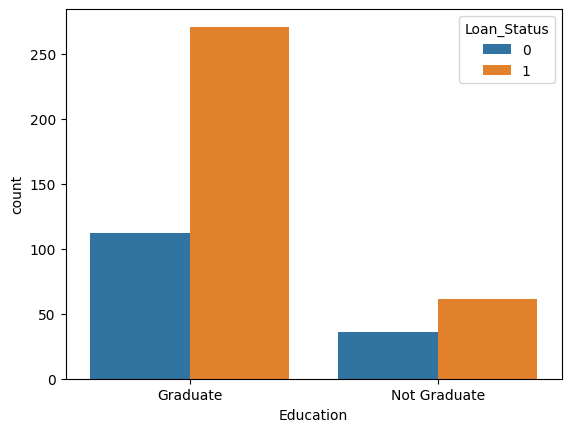

In [73]:
sns.countplot(x='Education',hue='Loan_Status',data=loandata)

Converting categorical coloumns to numerical values

In [74]:
loandata.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-74-7b3ed6b05dca>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loandata.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [75]:
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Seperating Data and label

In [76]:
x = loandata.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loandata['Loan_Status']

In [77]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Test Train Split

In [78]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

Training the model

In [79]:
classifier = svm.SVC(kernel='linear')

In [80]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Eval

In [82]:
xtrp = classifier.predict(x_train)
trdata_accuracy = accuracy_score(xtrp,y_train)

In [83]:
print('training data accuracy : ', trdata_accuracy)

training data accuracy :  0.7986111111111112


In [87]:
xtsp = classifier.predict(x_test)
tsdata_accuracy = accuracy_score(xtsp,y_test)

In [88]:
print('test data accuracy : ', tsdata_accuracy)

test data accuracy :  0.8333333333333334


predective system

In [90]:
data = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

data_np = np.asarray(data)

data_reshaped = data_np.reshape(1, -1)

prediction = classifier.predict(data_reshaped)

print("Prediction:", prediction)

if prediction[0] == 1:
    print("The loan is approved")
else:
    print("The loan is not approved")


Prediction: [1]
The loan is approved


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
